# Car Price Prediction

### Model Building Phase

In [1]:
# Importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the datafiles and loading the datasets,trying to understand the data.

df=pd.read_csv(r'C:\Users\JAYASHRI\Downloads\CarPriceData.csv')
df

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
0,Mahindra Xuv500 (2013),W8 Dual Tone,DIESEL,"58,000 KM",MANUAL,1st Owner,"Pitampura, Delhi",01/27/2022,435000
1,Hyundai Creta (2020),1.6 SX Option Executive Diesel,DIESEL,43861.0 KM,MANUAL,1st Owner,"Ahiritola, Kolkata",01/23/2022,1165101
2,Hyundai Verna (2019),VTVT 1.4 EX,PETROL,"17,000 KM",MANUAL,2nd Owner,"Chelavoor, Pantheeramkavu",01/25/2022,815000
3,Datsun Redigo (2020),D,PETROL,10000 KM,MANUAL,1st Owner,"Palam, Delhi",01/13/2022,270000
4,Hyundai I10 (2011),Sportz 1.1 iRDE2,PETROL,70000 KM,MANUAL,1st Owner,"Dwarka Sector 13, Delhi",01/13/2022,185000
...,...,...,...,...,...,...,...,...,...
5045,maruti suzuki 800 (1970),EX 5 Speed,LPG,"500,000 Km",Automatic,1st Owner,Alipur,01/23/2022,50000
5046,renault duster (2012),2012-2015 110PS Diesel RxZ,Diesel,"111,000 Km",Manual,1st Owner,"MDDA Colony Near Kedarpuram, Dehradun",01/23/2022,320000
5047,hyundai santro (2021),Sportz AMT,Petrol,"5,500 Km",Automatic,1st Owner,"Pragati Nagar, Ahmedabad",01/23/2022,599000
5048,hyundai verna (2013),VTVT 1.6 EX,Petrol,61231.0 Km,Manual,1st Owner,"Malad West, Mumbai",01/27/2022,395000


In [3]:
# Checking any null value present in dataset

df.isnull().sum()

Brand & Model          0
Varient               39
Fuel Type              0
Driven Kilometers      0
Transmission           0
Owner                  0
Location               0
Date of Posting Ad     0
Price (in ₹)           0
dtype: int64

In [4]:
#knowing the shape of the datasets
df.shape

(5050, 9)

They are 5050 rows and 9 columns is their in the dataset

In [5]:
df.columns

Index(['Brand & Model', 'Varient', 'Fuel Type', 'Driven Kilometers',
       'Transmission', 'Owner', 'Location', 'Date of Posting Ad',
       'Price (in ₹)'],
      dtype='object')

## Description for Dataset

- 'Brand & Model' : It gives us the brand of the car alongwith its model name and manufacturing year
- 'Varient' : It gives us the varient of particular car model
- 'Fuel Type' : It gives us the type of fuel used by the car
- 'Driven Kilometers' : It gives us the total distance in kms covered by car
- 'Transmission' : It tells us whether the gear transmission is Manual or Automatic
- 'Owner' : It tells us the total numbers of owners car had previously
- 'Location' : It gives us the locaion of the car
- 'Date of Posting Ad' : It teels us when the advertisement for selling that car was posted online
- 'Price (in ₹)' : It gives us the price of the car.

In the above dataset the target is to predict the 'Price' of car.

### Checking the datatype of the columns

In [6]:
#finding the datatypes of each of the columns.

df.dtypes

Brand & Model         object
Varient               object
Fuel Type             object
Driven Kilometers     object
Transmission          object
Owner                 object
Location              object
Date of Posting Ad    object
Price (in ₹)           int64
dtype: object

The dataset contains two types of data that is object and 'Price (in ₹)' is our target variable that is integer.

## Exploratory Data Analysis (EDA)

#### Data Visualization

To check missing values

<AxesSubplot:>

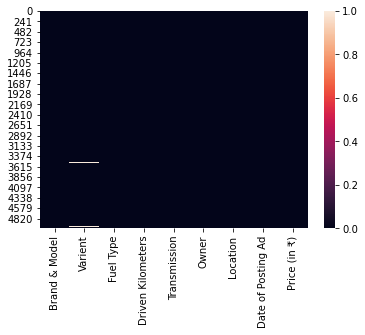

In [7]:
sns.heatmap(df.isnull())

This is the visualization of having just a small number null values in the dataset.

In [8]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Varient']=imp.fit_transform(df['Varient'].values.reshape(-1,1))

Treating the null values with mode using Simple Imputer

In [10]:
# Checking any null value present in dataset

df.isnull().sum()

Brand & Model         0
Varient               0
Fuel Type             0
Driven Kilometers     0
Transmission          0
Owner                 0
Location              0
Date of Posting Ad    0
Price (in ₹)          0
dtype: int64

Now there are no null values in the dataset.

### Data Analysis

<AxesSubplot:xlabel='Price (in ₹)'>

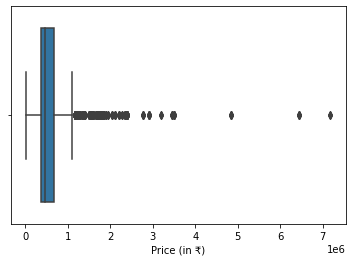

In [12]:
sns.boxplot(df['Price (in ₹)'])

<AxesSubplot:xlabel='Price (in ₹)', ylabel='Density'>

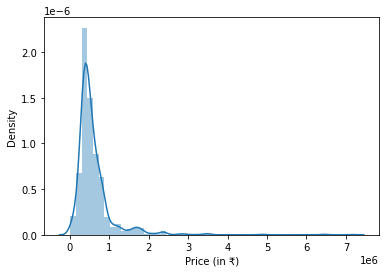

In [13]:
sns.distplot(df['Price (in ₹)'])

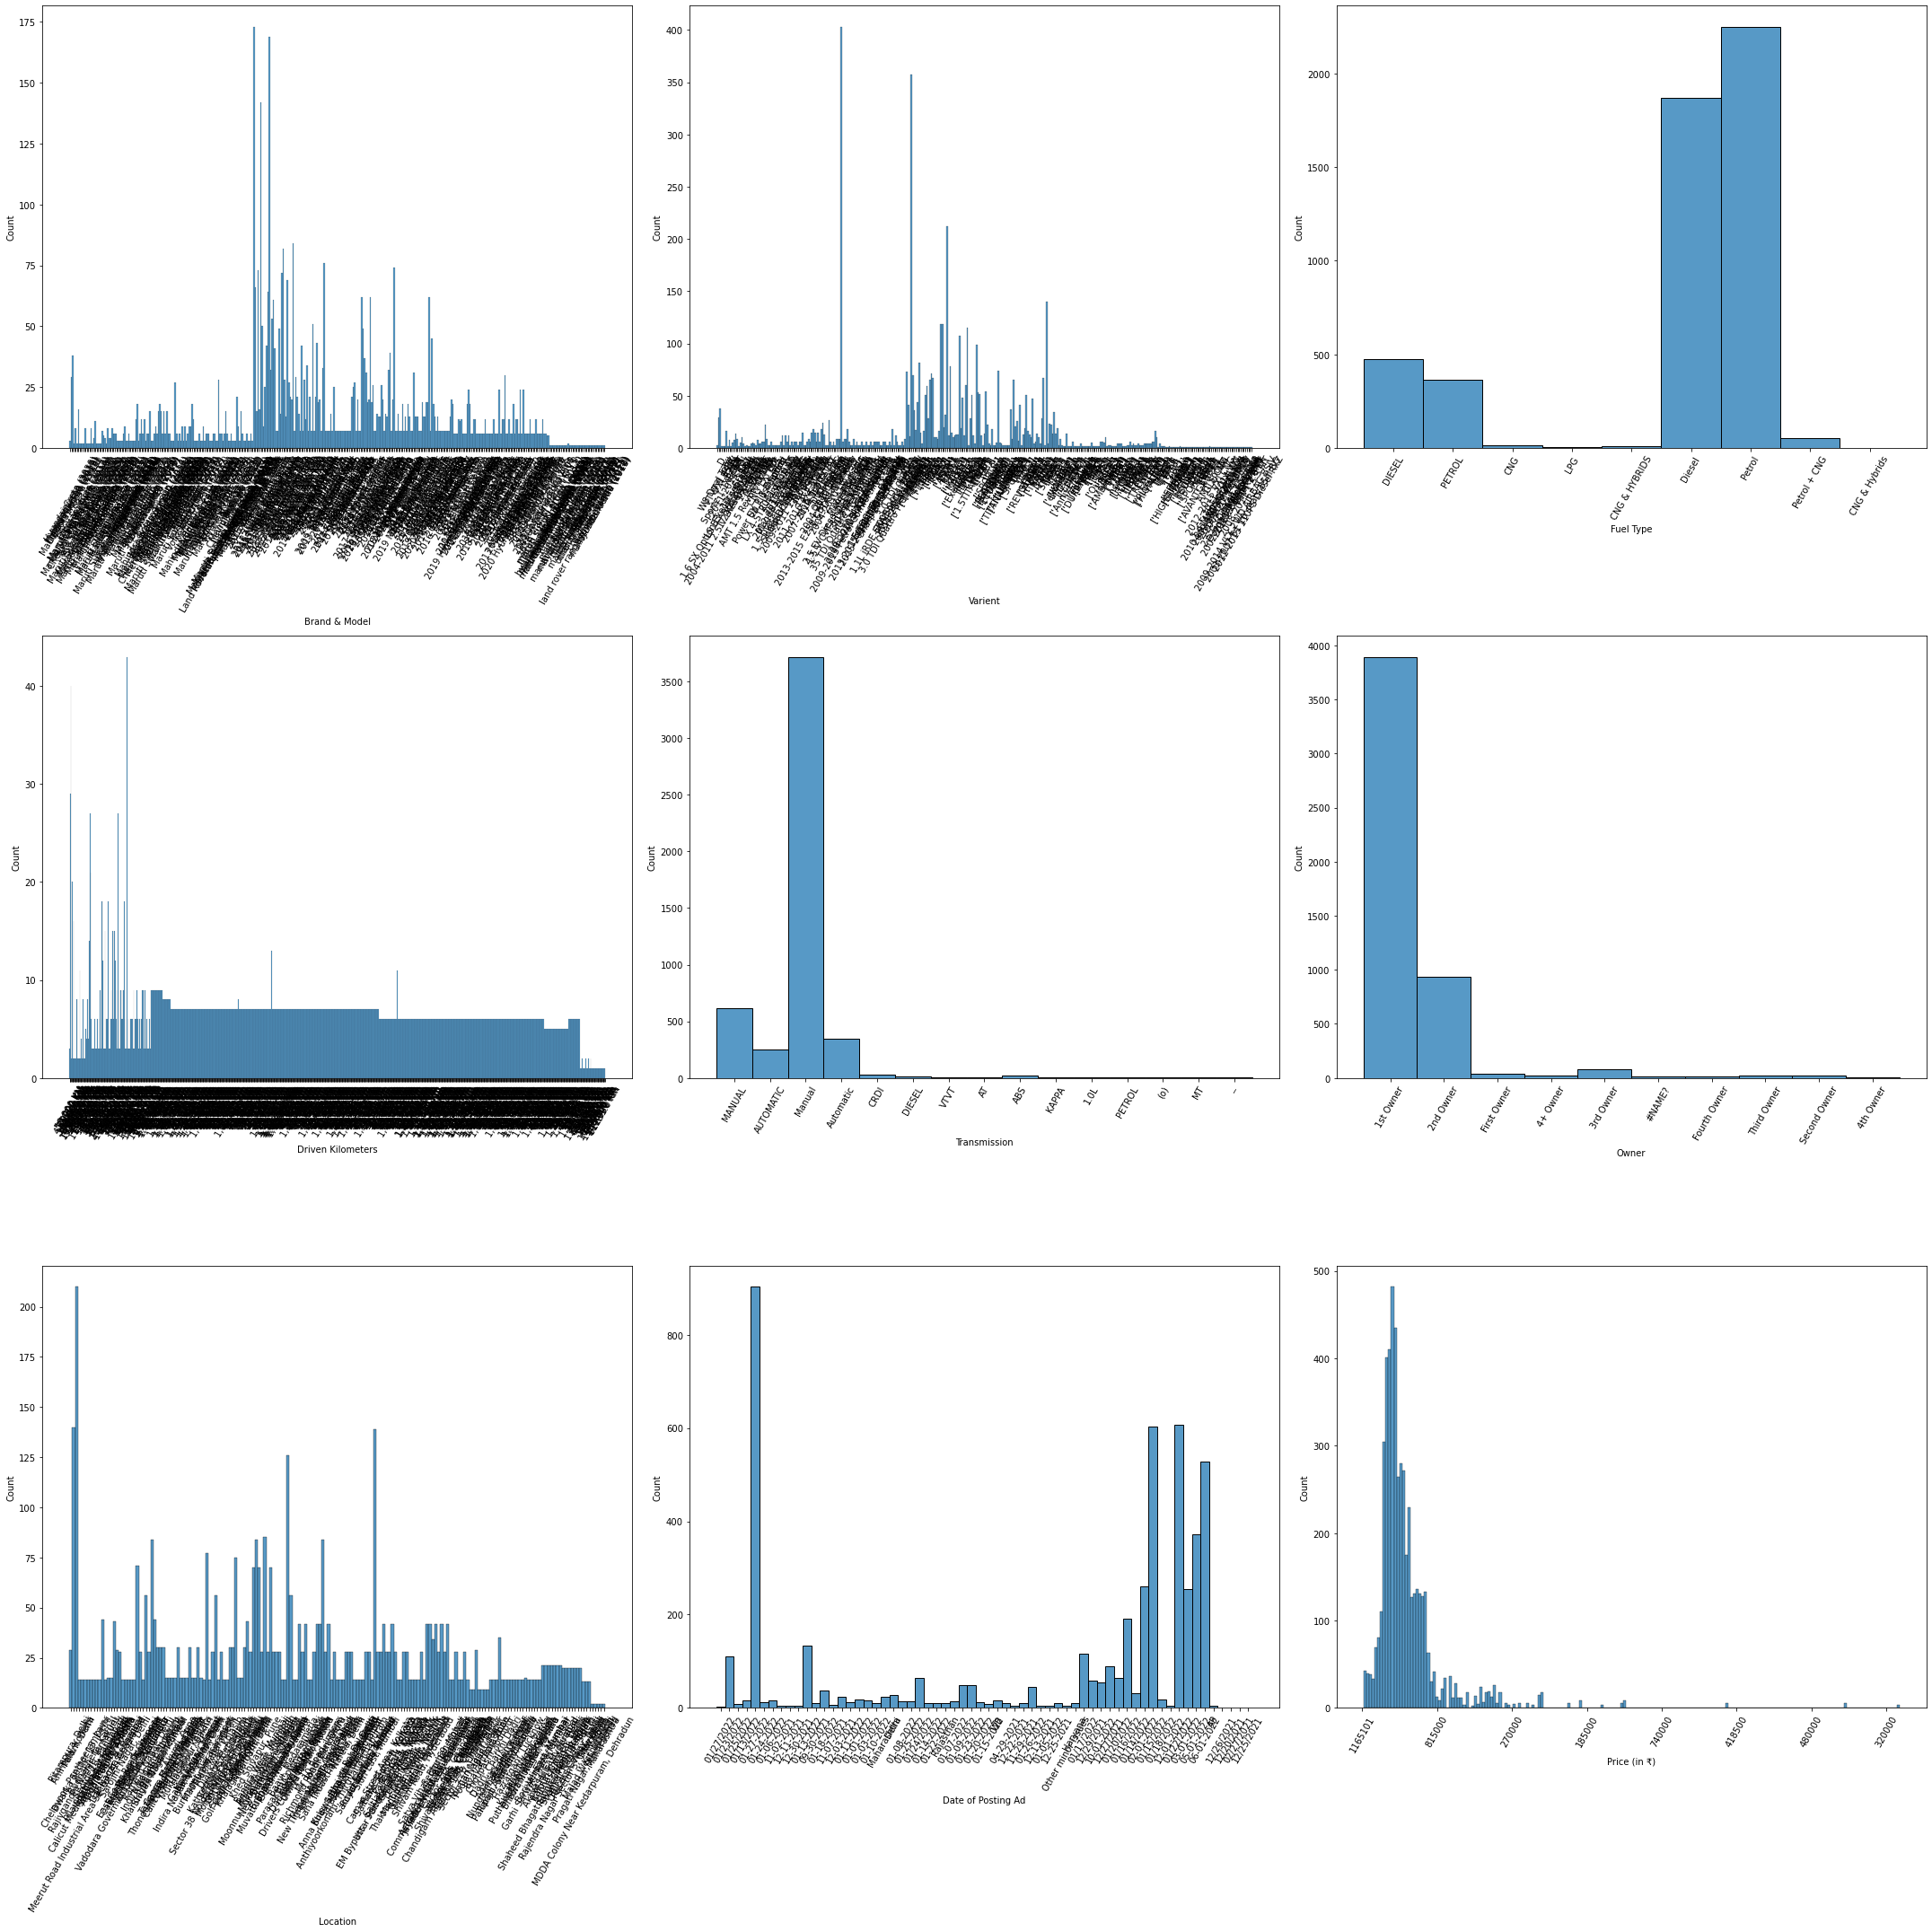

In [19]:
collist=df.columns.values
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(3,3,i+1)
    sns.histplot(data=df[collist[i]]).set_xticklabels(labels=df[collist[i]].unique(),rotation=60)
    plt.tight_layout()

- Brands, Varients, Driven Kilometers & Location have a wide range of values in them.

- Maximum Cars run on either Petrol or diesel. Only few goes for CNG and other fuels.

- Maximum Cars have Manual transnission.

- Maximum cars are being sold by their very 1st Owner.

- We have collected the cars posted online in last one month, from 25th December 2021 to 27th January 2022.

- Almost all the cars have a price rnging in between 270000 to 1165101.

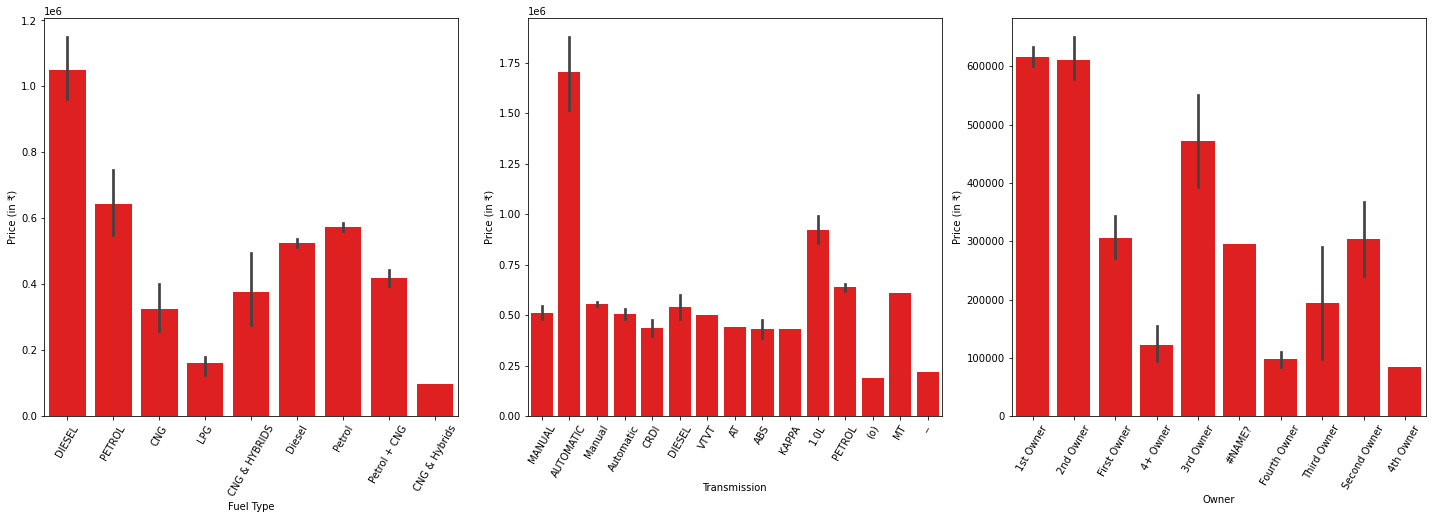

In [21]:
newcollist=['Fuel Type','Transmission','Owner']
plt.figure(figsize=(20,20))
for i in enumerate(newcollist):
    plt.subplot(3,3,i[0]+1)
    sns.barplot(data=df,x=i[1],y='Price (in ₹)',color='red')
    plt.xticks(rotation=60)
    plt.tight_layout()

Since Brands, Varients, Driven Kilometers & Location have a wide range of values in them, we will not perform bivariate analysis for them as they will not give us any specific details. Now by plotting graph of Fuel type, Transmission and Owner against Price, we conclude that Car that uses Diesel, have automatic Transmission and Has only 1 owner is more likely to have a high price.

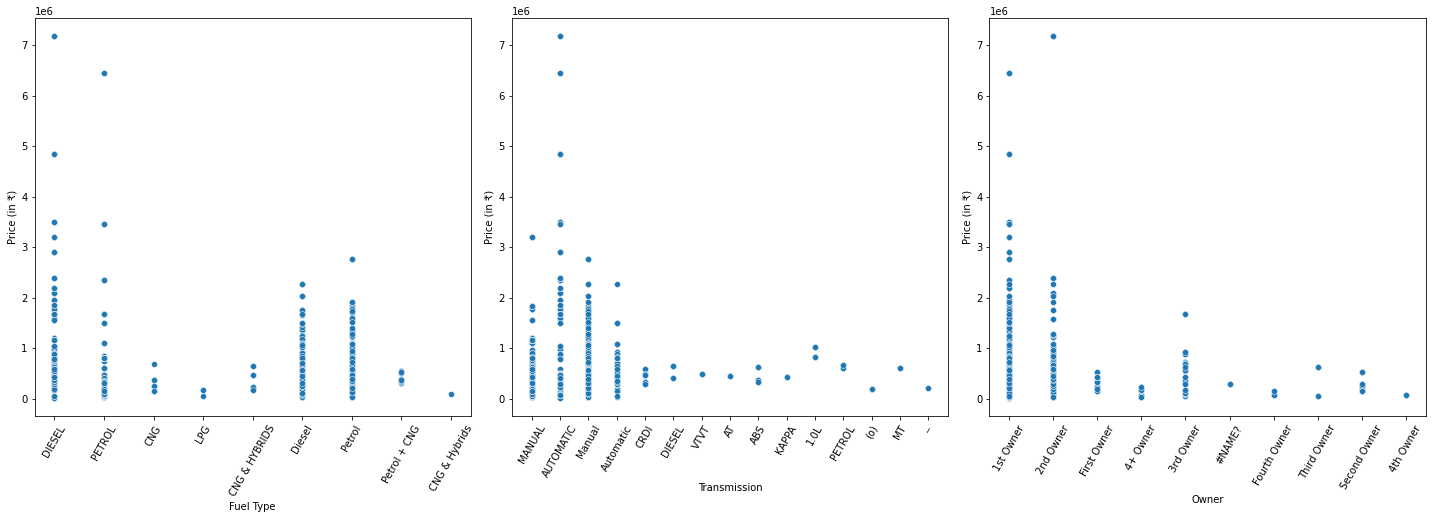

In [23]:
newcollist=['Fuel Type','Transmission','Owner']
plt.figure(figsize=(20,20))
for i in enumerate(newcollist):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(data=df,x=i[1],y='Price (in ₹)')
    plt.xticks(rotation=60)
    plt.tight_layout()

Just like bar graph, we can see that Price range is likely to be high for cars using Diesel as fuel, or having Automatic Transmission or is owned by only 1 Owner.

In [24]:
le = LabelEncoder()
for column in df.drop(['Price (in ₹)'],axis=1).columns:
    df[column]=le.fit_transform(df[column])
df   

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
0,266,143,3,543,10,1,123,31,435000
1,243,22,3,419,10,1,2,28,1165101
2,255,130,6,159,10,2,33,30,815000
3,226,79,6,80,10,1,115,20,270000
4,246,121,6,656,10,1,42,20,185000
...,...,...,...,...,...,...,...,...,...
5045,358,87,5,484,6,1,6,28,50000
5046,375,56,4,97,12,1,81,28,320000
5047,351,122,7,472,6,1,126,28,599000
5048,353,131,7,586,12,1,87,31,395000


### Summary Statistics

In [25]:
df.describe()

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
count,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5.050000e+03
mean,135.385743,220.393069,5.414059,393.438416,10.869901,1.358218,91.566337,27.202772,6.013569e+05
std,87.839967,87.321643,1.622358,224.821809,2.266356,1.003360,54.478849,10.618227,5.099877e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000e+04
25%,65.000000,156.000000,4.000000,201.000000,10.000000,1.000000,43.000000,19.000000,3.615990e+05
50%,126.000000,242.000000,6.000000,394.000000,12.000000,1.000000,91.000000,27.000000,4.711990e+05
75%,186.000000,300.000000,7.000000,590.000000,12.000000,1.000000,142.000000,36.000000,6.783990e+05
max,381.000000,344.000000,8.000000,785.000000,14.000000,9.000000,184.000000,61.000000,7.175000e+06


### To check Correlation

In [26]:
dfcor=df.corr()
dfcor

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
Brand & Model,1.000000,-0.549761,-0.103328,-0.012454,-0.409501,0.244979,-0.015031,-0.247280,0.164447
Varient,-0.549761,1.000000,0.232386,-0.055018,0.322436,-0.293263,0.028981,0.181717,-0.141752
Fuel Type,-0.103328,0.232386,1.000000,-0.173801,0.151421,-0.091137,-0.046087,0.073410,-0.095055
Driven Kilometers,-0.012454,-0.055018,-0.173801,1.000000,-0.045955,0.038275,0.031807,-0.015722,0.019880
Transmission,-0.409501,0.322436,0.151421,-0.045955,1.000000,-0.111978,-0.000938,0.192195,-0.262659
Owner,0.244979,-0.293263,-0.091137,0.038275,-0.111978,1.000000,0.037011,0.068787,-0.109540
Location,-0.015031,0.028981,-0.046087,0.031807,-0.000938,0.037011,1.000000,0.054421,-0.030871
Date of Posting Ad,-0.247280,0.181717,0.073410,-0.015722,0.192195,0.068787,0.054421,1.000000,-0.089048
Price (in ₹),0.164447,-0.141752,-0.095055,0.019880,-0.262659,-0.109540,-0.030871,-0.089048,1.000000


<AxesSubplot:>

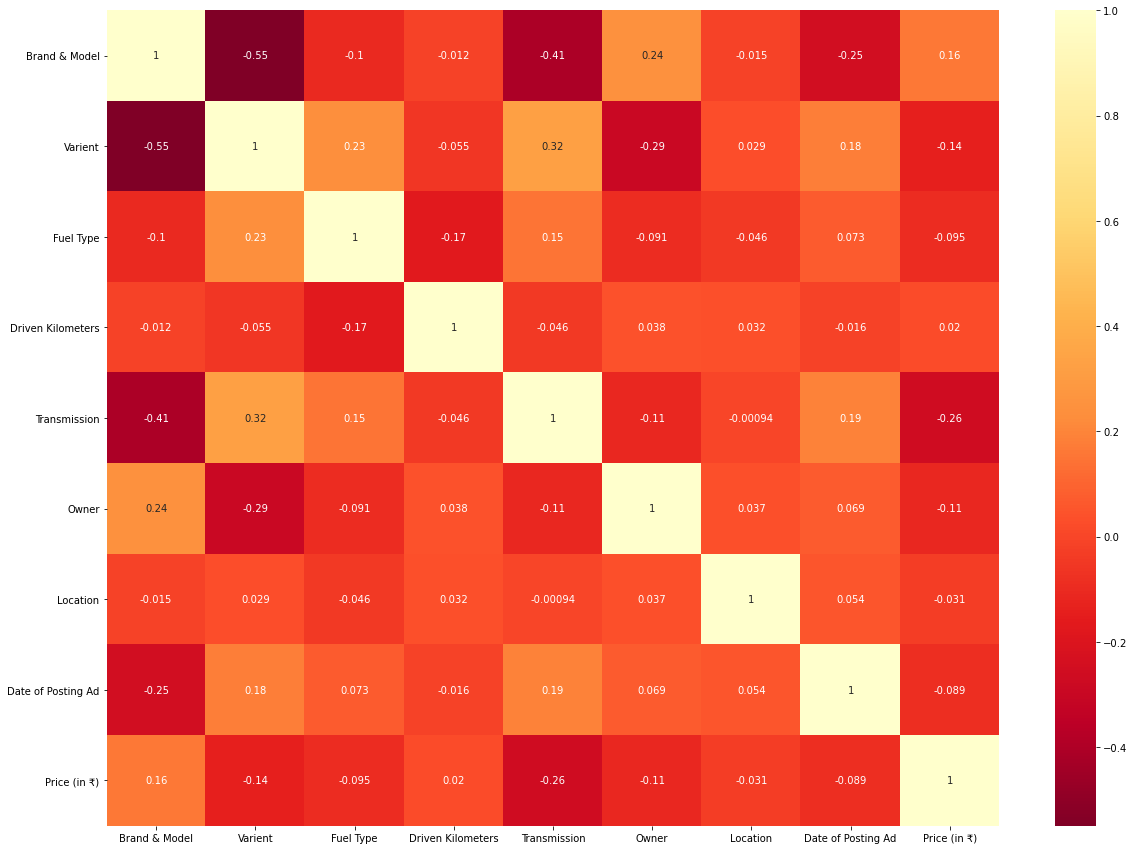

In [28]:
plt.figure(figsize=(20,15))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

There is no multicollinearity in the dataset.

### Splitting Data into Two parts namely X and Y

In [29]:
x= df.drop(['Price (in ₹)'],axis=1)
y=df['Price (in ₹)']
x

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad
0,266,143,3,543,10,1,123,31
1,243,22,3,419,10,1,2,28
2,255,130,6,159,10,2,33,30
3,226,79,6,80,10,1,115,20
4,246,121,6,656,10,1,42,20
...,...,...,...,...,...,...,...,...
5045,358,87,5,484,6,1,6,28
5046,375,56,4,97,12,1,81,28
5047,351,122,7,472,6,1,126,28
5048,353,131,7,586,12,1,87,31


In [30]:
y

0        435000
1       1165101
2        815000
3        270000
4        185000
         ...   
5045      50000
5046     320000
5047     599000
5048     395000
5049     580000
Name: Price (in ₹), Length: 5050, dtype: int64

### Power transforming and scaling the feature variables

In [31]:
x=power_transform(x,method='yeo-johnson')
scale = StandardScaler()
x=scale.fit_transform(x)

### Machine Learning Model for Regression

In [32]:
# Support Vector Regressor

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 45)
svr = SVR()
svr.fit(xtrain,ytrain)
pred_train_svr=svr.predict(xtrain)
pred_test_svr=svr.predict(xtest)
print('SVR Regressor Score:',svr.score(xtrain,ytrain))
print('SVR Regressor r2_score:',r2_score(ytest,pred_test_svr))
print("Mean squared error of SVR Regressor:",mean_squared_error(ytest,pred_test_svr))
print("Root Mean Square error of SVR Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_svr)))

SVR Regressor Score: -0.06325370730174851
SVR Regressor r2_score: -0.06820672247987791
Mean squared error of SVR Regressor: 297284446193.9865
Root Mean Square error of SVR Regressor: 545237.9720764012


The Accuracy of Support Vector Classifier is in negative which stats that this is not the correct model to apply here.

In [33]:
# Linear Regression

lr= LinearRegression()
lr.fit(xtrain,ytrain)
lr.coef_
pred_train=lr.predict(xtrain)
pred_test=lr.predict(xtest)
print('Linear Regression Score:',lr.score(xtrain,ytrain))
print('Linear Regression r2_score:',r2_score(ytest,pred_test))
print("Mean squared error of Linear Regression:",mean_squared_error(ytest,pred_test))
print("Root Mean Square error of Linear Regression:",np.sqrt(mean_squared_error(ytest,pred_test)))

Linear Regression Score: 0.055020586349048384
Linear Regression r2_score: 0.06136471313914871
Mean squared error of Linear Regression: 261224410556.74805
Root Mean Square error of Linear Regression: 511101.1744818711


The accuracy of Linear Regression is only 6%

In [34]:
# SGD Regressor

sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)
pred_train_sgd=sgd.predict(xtrain)
pred_test_sgd=sgd.predict(xtest)
print('SGD Regressor Score:',sgd.score(xtrain,ytrain))
print('SGD Regressor r2_score:',r2_score(ytest,pred_test_sgd))
print("Mean squared error of SGD Regressor:",mean_squared_error(ytest,pred_test_sgd))
print("Root Mean Square error of SGD Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_sgd)))

SGD Regressor Score: 0.05172007246878407
SGD Regressor r2_score: 0.05794116336476118
Mean squared error of SGD Regressor: 262177192520.46155
Root Mean Square error of SGD Regressor: 512032.41354474967


The accuracy of SGD Regressor is also very poor, it's only 6%

In [35]:
# KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(xtrain,ytrain)
pred_train_knr=knr.predict(xtrain)
pred_test_knr=knr.predict(xtest)
print('K Neighbors Regressor Score:',knr.score(xtrain,ytrain))
print('K Neighbors Regressor r2_score:',r2_score(ytest,pred_test_knr))
print("Mean squared error of K Neighbors Regressor:",mean_squared_error(ytest,pred_test_knr))
print("Root Mean Square error of K Neighbors Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_knr)))

K Neighbors Regressor Score: 0.7482974029931317
K Neighbors Regressor r2_score: 0.6045261241639399
Mean squared error of K Neighbors Regressor: 110061310875.45856
Root Mean Square error of K Neighbors Regressor: 331754.89578220027


The accuracy of K Neighbors Regressor is 60% which is okay.

In [36]:
# Decision Tree Regressor

dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(xtrain,ytrain)
pred_train_dtr=dtr.predict(xtrain)
pred_test_dtr=dtr.predict(xtest)
print('Decision Tree Regressor Score:',dtr.score(xtrain,ytrain))
print('Decision Tree Regressor r2_score:',r2_score(ytest,pred_test_dtr))
print("Mean squared error of Decision Tree Regressor:",mean_squared_error(ytest,pred_test_dtr))
print("Root Mean Square error of Decision Tree Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_dtr)))

Decision Tree Regressor Score: 0.9979397374843745
Decision Tree Regressor r2_score: 0.8047399136404639
Mean squared error of Decision Tree Regressor: 54341341816.70825
Root Mean Square error of Decision Tree Regressor: 233112.29443491017


The accuracy of Decision Tree Regressor is 80.2 % which is in acceptable range.

In [37]:
# Random Forest Regressor

rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
pred_train_rf=rf.predict(xtrain)
pred_test_rf=rf.predict(xtest)
print('Random Forest Regressor Score:',rf.score(xtrain,ytrain))
print('Random Forest Regressor r2_score:',r2_score(ytest,pred_test_rf))
print("Mean squared error of Random Forest Regressor:",mean_squared_error(ytest,pred_test_rf))
print("Root Mean Square error of Random Forest Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_rf)))

Random Forest Regressor Score: 0.9807517743275783
Random Forest Regressor r2_score: 0.8785184873354795
Mean squared error of Random Forest Regressor: 33808591029.495247
Root Mean Square error of Random Forest Regressor: 183871.12614408834


The accuracy of Random Forest Regressor is 87.56% which is quite good.

### Cross Validation Score

In [38]:
print('Cross Validation Score of SVR is',(cvs(svr,x,y,cv=5).mean())*100)
print('Cross Validation Score of Linear Regression is',(cvs(lr,x,y,cv=5).mean())*100)
print('Cross Validation Score of SGD Regressor is',(cvs(sgd,x,y,cv=5).mean())*100)
print('Cross Validation Score of KNeighbors Regressor is',(cvs(knr,x,y,cv=5).mean())*100)
print('Cross Validation Score of Decision Tree Regressor is',(cvs(dtr,x,y,cv=5).mean())*100)
print('Cross Validation Score of Random Forest Regressor is',(cvs(rf,x,y,cv=5).mean())*100)

Cross Validation Score of SVR is -6.937914977243179
Cross Validation Score of Linear Regression is -3.979872647154277
Cross Validation Score of SGD Regressor is -4.349986122006932
Cross Validation Score of KNeighbors Regressor is 41.90766313041919
Cross Validation Score of Decision Tree Regressor is 58.8597950318791
Cross Validation Score of Random Forest Regressor is 79.93785923656438


After comparing r2_score and Cross validation score, we will select Random Forest Regressor for Hyper Parameter Tuning.

### Hyper Parameter Tuning

In [39]:
parameter = { 'bootstrap': [True, False],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],}

gvc = GridSearchCV(RandomForestRegressor(),parameter,cv=5)
gvc.fit(xtrain,ytrain)
gvc.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

Getting all the best parameter to apply in our selected model.

In [41]:
pricecar = RandomForestRegressor(bootstrap=False,min_samples_leaf=1,max_features='sqrt',min_samples_split=2)
pricecar.fit(xtrain,ytrain)
pred=pricecar.predict(xtest)
acc=r2_score(ytest,pred)
print('Score of Hyper Parameter Tuned Ranfom Forest Regressor is:',pricecar.score(xtrain,ytrain))
print('Accuracy for predicting price of car is', (acc*100),'%')
print("Mean squared error of Hyper Parameter Tuned Random Forest Regressor:",mean_squared_error(ytest,pred))
print("Root Mean Square error of Hyper Parameter Tuned Random Forest Regressor:",np.sqrt(mean_squared_error(ytest,pred)))

Score of Hyper Parameter Tuned Ranfom Forest Regressor is: 0.9979397283976865
Accuracy for predicting price of car is 87.66828466806159 %
Mean squared error of Hyper Parameter Tuned Random Forest Regressor: 34319454146.163742
Root Mean Square error of Hyper Parameter Tuned Random Forest Regressor: 185255.1055873056


The accuracy of Model 'PriceCar' (Random Forest Regressor) after applying Hyper Tuned Parameters is found to be 87.79% and the score is 0.98 which is quite good.

## Conclusion

In [42]:
a= np.array(ytest)
predicted = np.array(pricecar.predict(xtest))
Price=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
Price

,Original,Predicted
0,675000,675000.00
1,619899,619899.00
2,528199,528199.00
3,380000,380000.00
4,303799,303799.00
...,...,...
1510,776799,776799.00
1511,384899,509041.00
1512,391599,483877.01
1513,502699,502699.00


Here, we can see that all the predicted prices are either equal or nearly equal to the original prices of the car. Hence we conclude that our model 'pricecar' is working very well. And we shall save it for further use.

### Model Saving

In [43]:
import pickle
filename = 'PriceCar.pkl'
pickle.dump(pricecar,open(filename,'wb'))

Finally we have saved our best model.